In [1]:
import pandas as pd
import shap
from chemml.models import MLP
from chemml.explain import Explain

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
train_X = train[train.columns[4:]]
train_y = train['LogS']
test_X = test[test.columns[4:]]
test_y = test['LogS']

In [4]:
r1_pytorch = MLP(engine='pytorch',nfeatures=train_X.shape[1], nneurons=[64, 128], activations=['ReLU','ReLU'],
        learning_rate=0.01, alpha=0.001, nepochs=100, batch_size=50, loss='mean_squared_error', 
        is_regression=True, nclasses=None, layer_config_file=None, opt_config='sgd')

In [5]:
r1_pytorch.get_model()

Sequential(
  (0): Linear(in_features=41, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=1, bias=True)
)

In [6]:
from sklearn.preprocessing import StandardScaler

x_scale = StandardScaler()
train_X = x_scale.fit_transform(train_X)
test_X = x_scale.transform(test_X)

In [7]:
y_scale = StandardScaler()
train_y = y_scale.fit_transform(train_y.values.reshape(-1, 1))

In [8]:
r1_pytorch.fit(train_X, train_y)

In [9]:
from chemml.utils import regression_metrics

test_pred = r1_pytorch.predict(test_X)
test_pred = y_scale.inverse_transform(test_pred)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [11]:
r2_score(test_y, test_pred)

0.7659228605724864

In [12]:
mean_squared_error(test_y, test_pred,squared=False)

1.1359571282541714

In [13]:
mean_absolute_error(test_y, test_pred)

0.796704046907218

In [14]:
# For Local Explanantions 
X_instance = train_X
exp = Explain(X_instance = X_instance, dnn_obj = r1_pytorch.get_model(), feature_names = list(train.columns[4:]))

explanation, shap_obj = exp.DeepSHAP(X_background = train_X[1:10])

explanation

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,NumAtoms,NumHeteroatoms,...,chi0n,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi
0,-0.075928,-0.084394,0.002670,0.043122,0.026614,-0.055448,-0.158368,0.053895,0.166222,-0.019829,...,0.131947,-0.057690,0.006058,0.001507,-0.010875,-0.577941,0.105498,-0.011967,0.000029,0.003709
1,-0.086246,-0.104486,0.025657,-0.046416,0.020010,0.040420,-0.135240,0.033236,0.179740,-0.018782,...,0.119291,-0.101999,-0.027315,-0.027063,0.106102,-0.665675,0.080236,0.005335,0.000088,-0.007517
2,0.010853,0.015910,-0.147859,-0.029249,-0.019698,0.115812,0.085031,-0.003099,-0.071844,0.039949,...,-0.025427,0.018643,0.006690,0.006582,-0.020306,-0.041204,-0.058390,0.013991,0.000489,-0.016645
3,0.081374,0.094746,-0.045404,0.021314,0.024243,0.036825,0.005289,-0.038189,-0.165671,0.043992,...,-0.107036,0.078947,0.027476,0.019027,-0.035299,0.151222,-0.090490,0.017179,0.000224,-0.017148
4,0.070319,0.084822,0.034607,-0.054136,0.060162,-0.009775,-0.046752,-0.030461,-0.114360,0.016859,...,-0.076946,0.056466,0.029347,0.026588,-0.005468,0.086351,-0.102124,0.026122,0.000476,-0.039033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7908,-0.075854,-0.083231,-0.162269,0.017245,-0.026258,0.014809,0.262932,0.032762,0.262203,-0.020440,...,0.165910,-0.035053,0.016953,0.014661,0.008994,0.081604,0.129737,-0.020804,0.000045,0.003553
7909,-0.036108,-0.055623,0.190707,-0.113441,0.012054,0.086628,-0.325156,0.040514,0.067924,-0.068025,...,0.056067,-0.018297,0.014616,0.012970,-0.014315,-0.391700,0.064410,0.003949,0.000258,-0.018114
7910,0.074332,0.091205,0.026863,-0.054867,0.028502,-0.011080,-0.023294,-0.045631,-0.176758,0.020668,...,-0.107884,0.080618,0.041337,0.041416,-0.003999,0.100471,-0.141412,0.031420,0.000602,-0.055105
7911,-0.023362,-0.066557,0.326798,-0.213018,0.006756,0.258257,-0.327327,0.084413,0.110894,0.041103,...,0.069618,-0.077540,0.002644,0.004959,0.033159,-0.515989,0.174252,-0.017154,0.000066,-0.004352


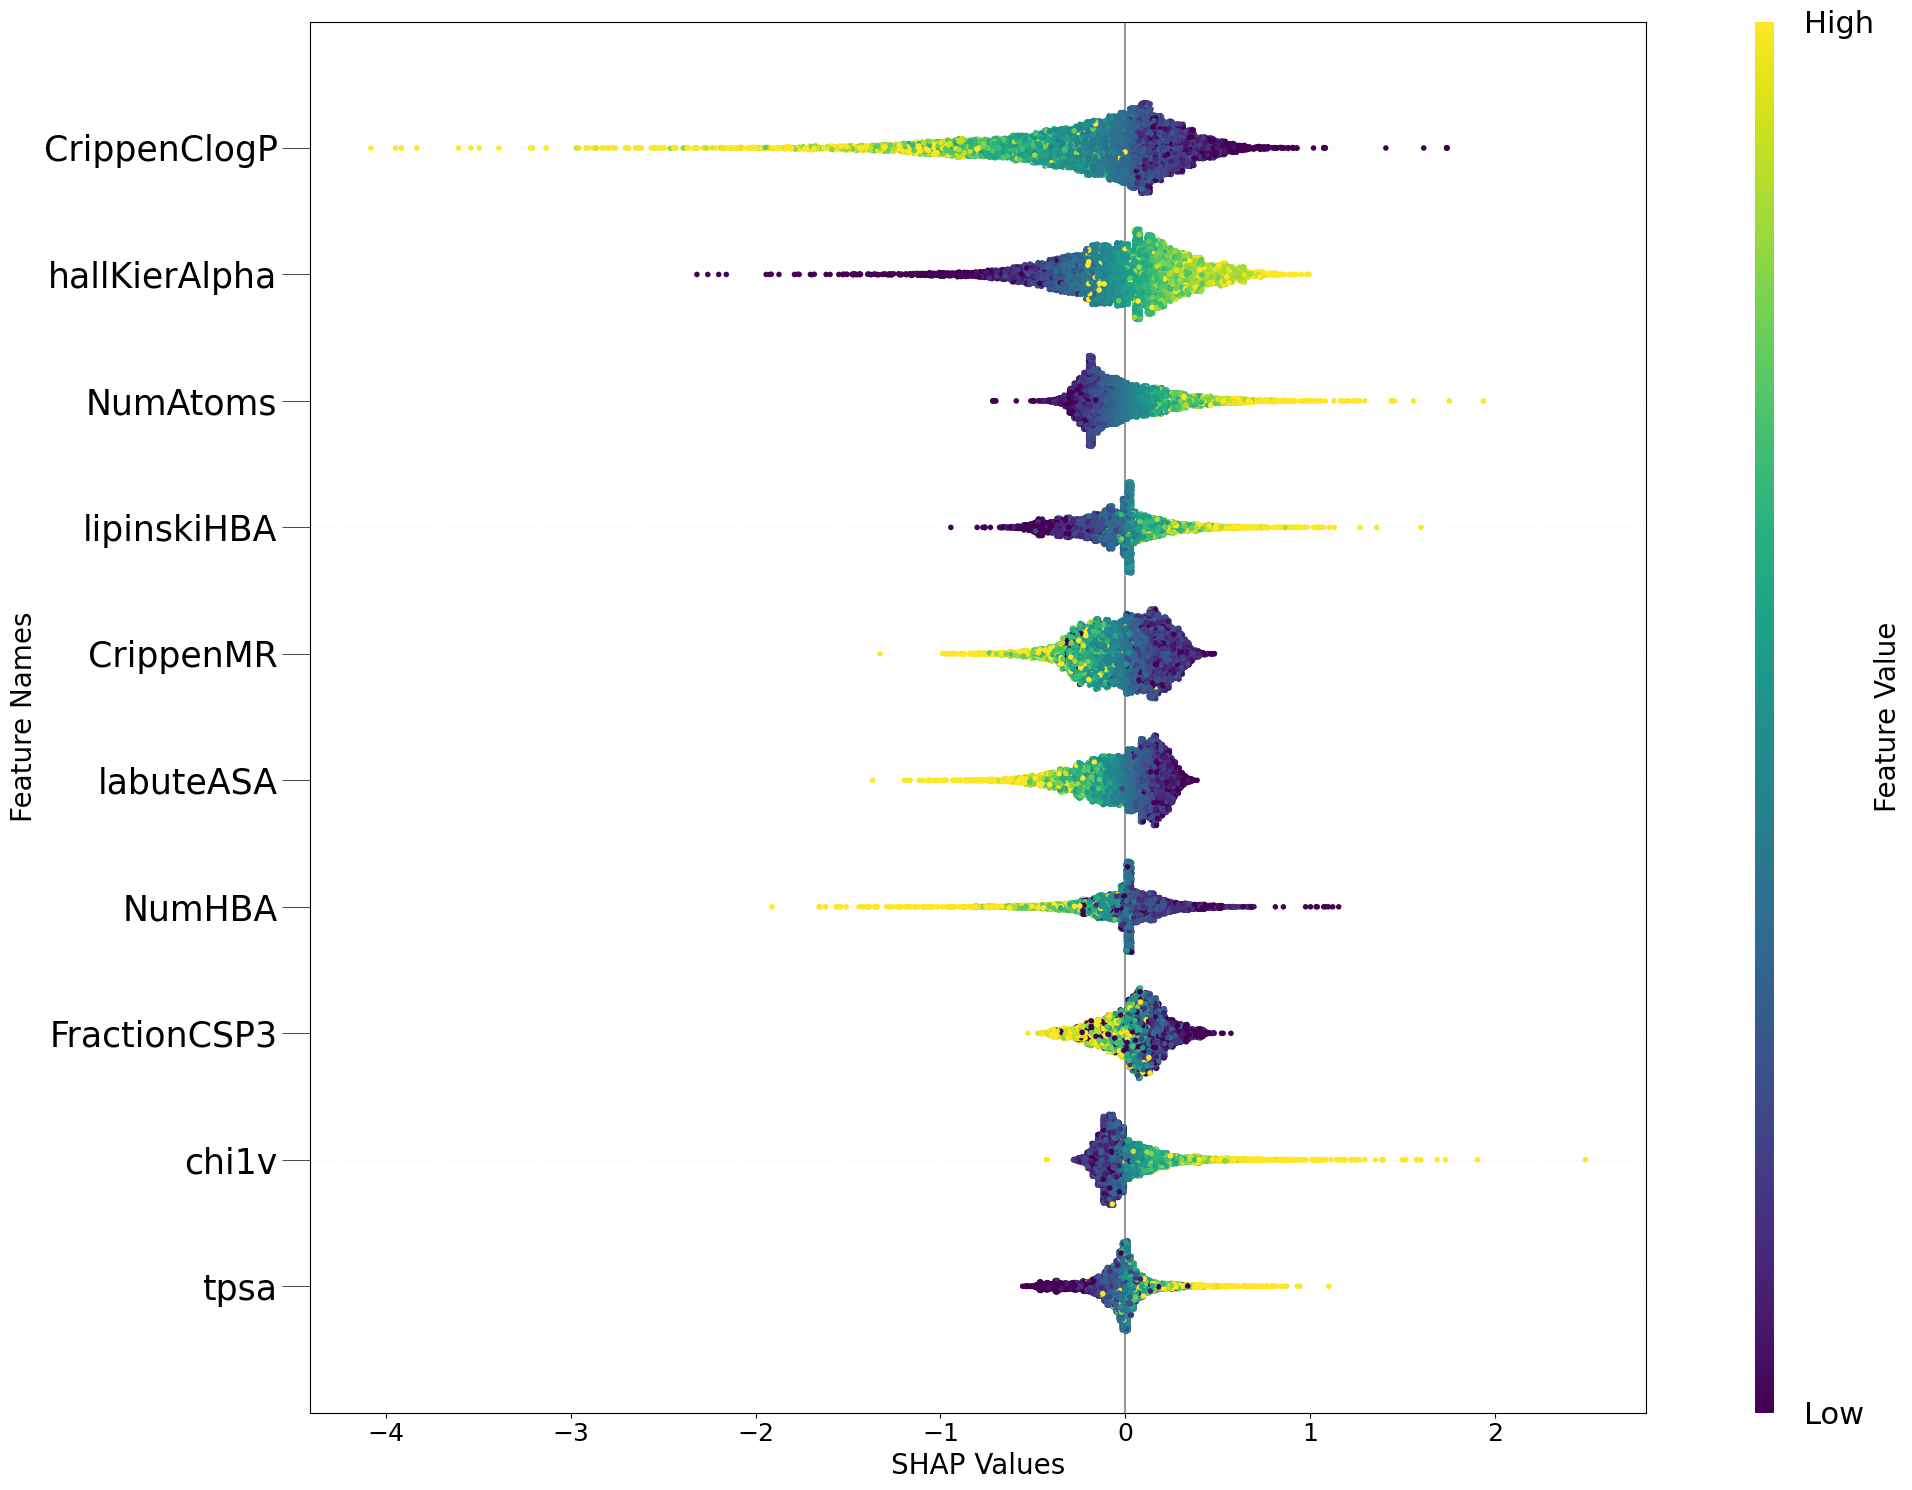

In [15]:
fig = exp.plot(local=False, rel_df=explanation,max_display=10, shap_obj=shap_obj)

In [16]:
# strategies + global relevance
X_instance = train_X

exp = Explain(X_instance = X_instance, dnn_obj = r1_pytorch.get_model(), feature_names = list(train.columns[4:]))

explanation, gb = exp.LRP(strategy='zero', global_relevance=True)
explanation.head()

,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,NumAtoms,NumHeteroatoms,...,chi0n,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi
0,0.060858,0.056374,-0.023002,0.169841,-0.041731,0.049515,0.191403,-0.048350,-0.170342,0.037008,...,-0.135452,0.034567,0.013381,0.013882,0.000187,0.435583,-0.092822,0.012713,0.000021,-0.006897
1,0.038377,0.045047,-0.009525,0.065398,-0.003444,-0.002792,0.075180,0.006914,-0.099722,0.012920,...,-0.055231,0.081405,0.044284,0.039055,-0.109505,0.529031,-0.038723,0.002804,0.002687,0.010154
2,0.007207,0.009020,-0.034638,-0.023462,-0.030211,0.027162,0.029425,-0.003580,-0.032885,0.025153,...,-0.015601,0.003917,-0.000426,-0.000642,-0.006629,-0.014621,-0.027775,0.002843,0.000548,-0.001872
3,0.013097,0.031815,-0.059267,0.036923,0.013138,-0.004032,0.009803,-0.039896,-0.084541,0.059121,...,-0.082754,0.081313,-0.064317,-0.089067,-0.077728,0.195349,-0.068366,-0.005900,0.003283,-0.023640
4,0.051325,0.063089,-0.004115,0.031351,0.100584,-0.015649,-0.024659,-0.031508,-0.062133,0.030859,...,-0.058510,0.023413,0.015121,0.015996,0.004245,0.046962,-0.064331,0.023452,0.000816,-0.005784


In [17]:
gb.head()

,Mean Absolute Relevance Score,Mean Relevance Score
CrippenClogP,0.343585,0.309667
hallKierAlpha,0.170709,0.073975
NumHBA,0.161511,-0.019214
lipinskiHBA,0.154586,0.015015
NumAtoms,0.136893,-0.067823


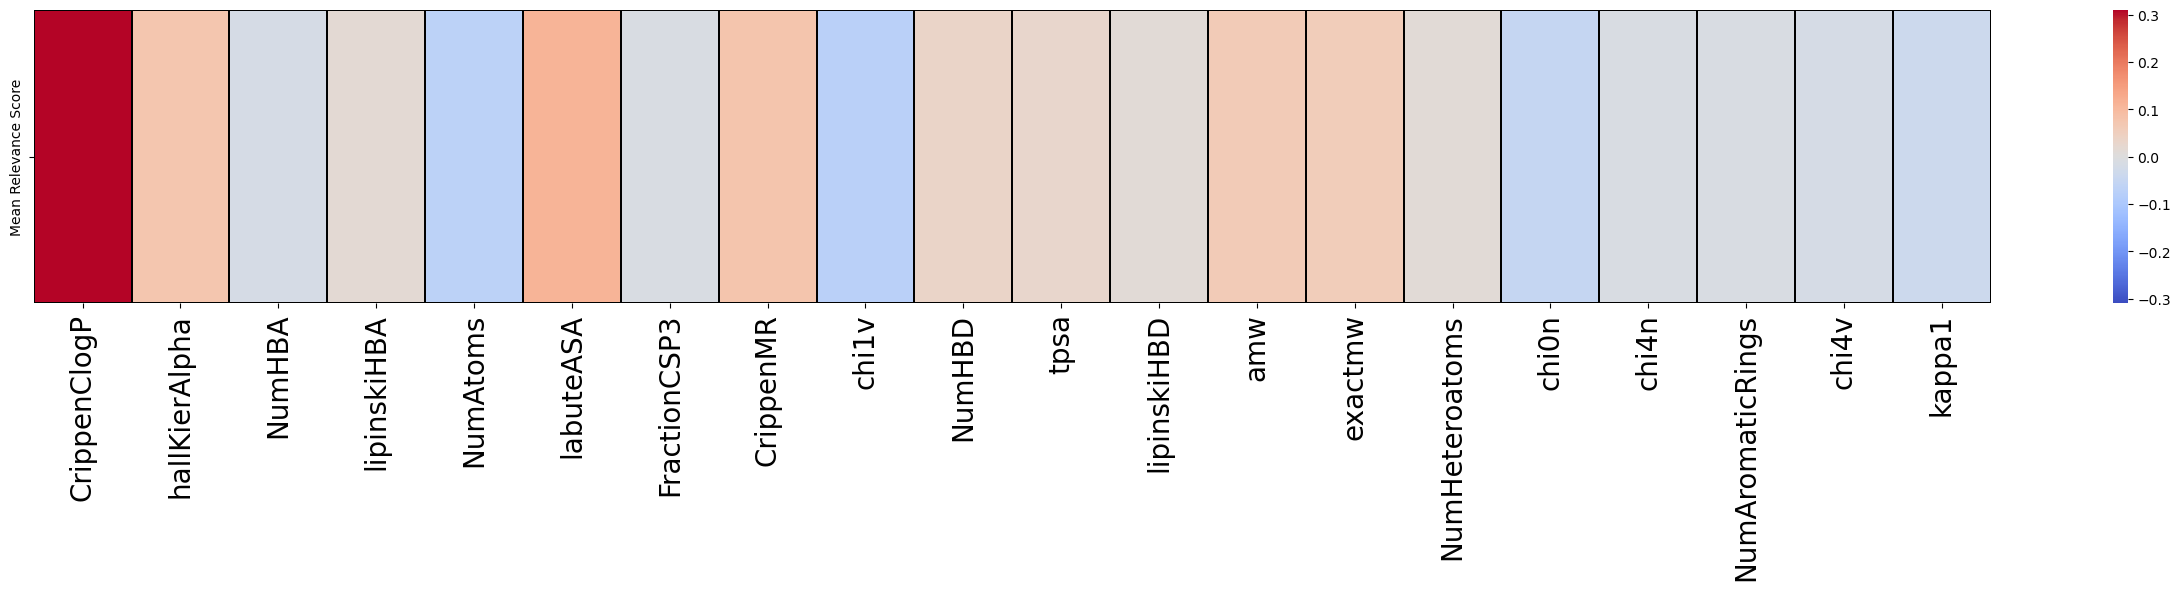

In [18]:
f = exp.plot(local=False,rel_df = gb, max_display=20)